In [1]:
import numpy as np
import matplotlib.pyplot as plt
from structured_light_tomography import dataset_generation as dg
import h5py
from tqdm import trange

In [2]:
modes = dg.PureModes(3,64,2.5,np.pi/2,1)
x,y = modes.generate_dataset(10,augment=True)

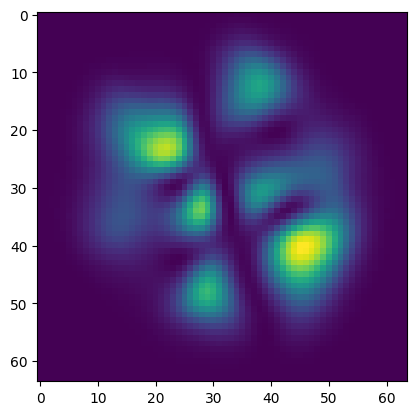

In [4]:
plt.imshow(x[6,1,:,:])

In [5]:
def batch_save_h5(saving_path,modes,nbatches,batchsize):
    res = modes.grid_res
    order = modes.order
    with h5py.File(saving_path,'a') as f:
        f.create_dataset(f'x_order{order}',(nbatches*batchsize,2,res,res),dtype='float32')
        f.create_dataset(f'y_order{order}',(nbatches*batchsize,2*(order+1)),dtype='float32')
        for i in trange(nbatches):
            x,y = modes.generate_dataset(batchsize,augment=True)
            f[f'x_order{order}'][i*batchsize:(i+1)*batchsize,:,:,:] = x
            f[f'y_order{order}'][i*batchsize:(i+1)*batchsize,:] = y

In [6]:
batch_save_h5("TrainingData/pure.h5",modes,10**2,10**3)

100%|██████████| 100/100 [02:19<00:00,  1.39s/it]
